## 交叉验证

### 自定义实现交叉验证

In [4]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [5]:
iris = load_iris()
X = iris.data
y = iris.target
k = 5  # number of folds
n_samples = X.shape[0]  # number of samples
fold_size = n_samples // k  # size of each fold
knn = KNeighborsClassifier(n_neighbors=k)
scores = []  # to store the scores for each fold
indices = np.random.permutation(n_samples)  # shuffle the indices
indices

array([141,  77,  67, 104,   2,  54, 105,  49,   4, 102,  17,  52,  22,
        21,  41,  28, 120, 114,  11, 101,  19,  10,  82,  80, 121, 115,
       111,  84,  40,   5, 119, 133,  34, 118,  59,  66,  16,  89, 110,
        23,  60,  98,  29,  75,  56, 116,  97,  86,  72,  94, 126, 112,
        12,  76, 127,  88,  74,  55,  96,  93,  63,  90, 100,  70,  92,
        42, 125, 140, 146,  50,   3, 138, 122, 124,  99,  27,   6,  44,
       113,   8, 134,  85,  47,  48,  24,  73,  39, 137, 147,  71, 136,
       129, 106, 131,  15,  46, 123,   1,  51,  65,  25, 132, 107,  14,
        61, 108, 103,  58,  91,  31,  20, 109,  95, 139,  45,  33,  38,
        53, 149,   7, 148,  87,  13,  43,  81,  64, 117, 130,  26,  78,
        18, 142, 128, 143,  35,  69,   0,  68,  83,  32,  79, 135,  37,
       144,  62,  30,  57, 145,   9,  36], dtype=int32)

将数据集划分为k个折叠

In [6]:
folds = [indices[i*fold_size:(i+1)*fold_size] for i in range(k)]
folds

[array([141,  77,  67, 104,   2,  54, 105,  49,   4, 102,  17,  52,  22,
         21,  41,  28, 120, 114,  11, 101,  19,  10,  82,  80, 121, 115,
        111,  84,  40,   5], dtype=int32),
 array([119, 133,  34, 118,  59,  66,  16,  89, 110,  23,  60,  98,  29,
         75,  56, 116,  97,  86,  72,  94, 126, 112,  12,  76, 127,  88,
         74,  55,  96,  93], dtype=int32),
 array([ 63,  90, 100,  70,  92,  42, 125, 140, 146,  50,   3, 138, 122,
        124,  99,  27,   6,  44, 113,   8, 134,  85,  47,  48,  24,  73,
         39, 137, 147,  71], dtype=int32),
 array([136, 129, 106, 131,  15,  46, 123,   1,  51,  65,  25, 132, 107,
         14,  61, 108, 103,  58,  91,  31,  20, 109,  95, 139,  45,  33,
         38,  53, 149,   7], dtype=int32),
 array([148,  87,  13,  43,  81,  64, 117, 130,  26,  78,  18, 142, 128,
        143,  35,  69,   0,  68,  83,  32,  79, 135,  37, 144,  62,  30,
         57, 145,   9,  36], dtype=int32)]

In [7]:
for i in range(k):
    test_indices = folds[i]
    train_indices = np.concatenate([folds[j]
                                   for j in range(k) if j != i], axis=0)
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)
scores

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

### SKLearn工具包中的实现

In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=k)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

## 模型验证曲线

### 学习曲线

In [13]:
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    knn, X, y, cv=k, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)
train_sizes, train_scores, test_scores

(array([ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120]),
 array([[1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.98809524, 0.97619048, 0.98809524, 0.98809524, 0.97619048],
        [0.97916667, 0.96875   , 0.97916667, 0.98958333, 0.98958333],
        [0.97222222, 0.97222222, 0.97222222, 0.98148148, 0.96296296],
        [0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667]]),
 array([[0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
        [0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333],
        [0.66666667, 0.66666

In [14]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std

(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.98333333, 0.98125   , 0.97222222, 0.97      ]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00583212, 0.00779512, 0.00585607, 0.00408248]),
 array([0.33333333, 0.33333333, 0.33333333, 0.66666667, 0.66666667,
        0.66666667, 0.84666667, 0.93333333, 0.96666667, 0.97333333]),
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.04988877, 0.02981424, 0.03651484, 0.02494438]))

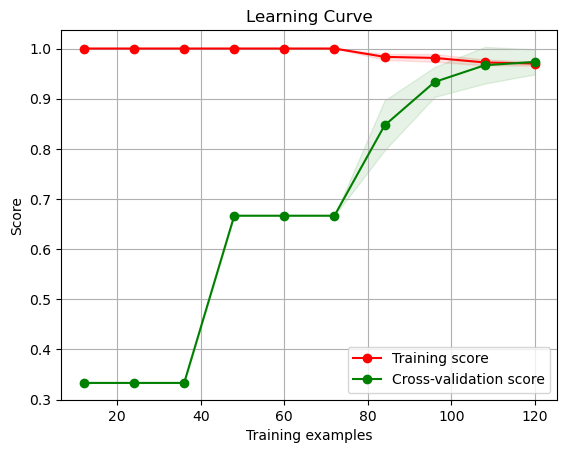

In [ ]:
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()

### 验证曲线

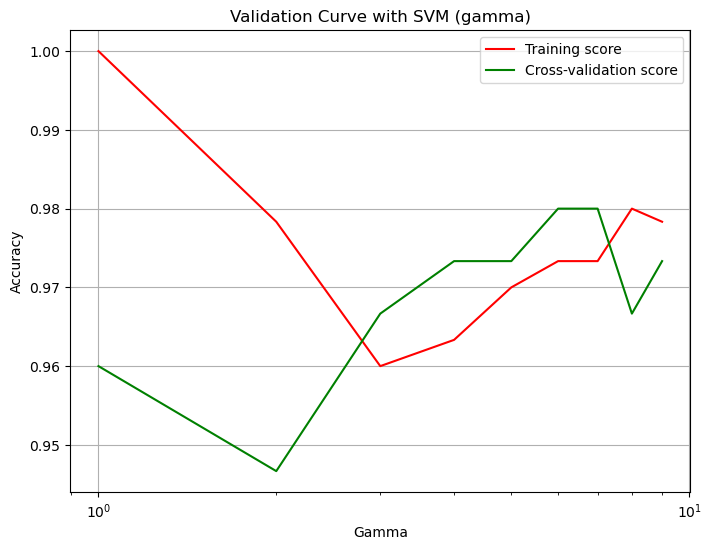

In [19]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 10)

train_scores, test_scores = validation_curve(
    knn, X, y, param_name='n_neighbors', param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

# 计算训练集和验证集的平均得分
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# 绘制验证曲线
plt.figure(figsize=(8, 6))
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.plot(param_range, test_scores_mean,
         label="Cross-validation score", color="g")

# 设置图形属性
plt.title(f"Validation Curve with KNN (n_neighbors)")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.xscale("log")  # 对数尺度
plt.legend(loc="best")
plt.grid(True)
plt.show()

### 手动实现验证曲线

In [ ]:
from sklearn.model_selection import KFold
model = knn
param_name = 'n_neighbors'
param_range = np.arange(1, 10)
# 初始化存储得分的数组
train_scores = []
test_scores = []
for param_value in param_range:
    # 设置超参数
    model.set_params(**{param_name: param_value})

    # 初始化当前超参数值的得分
    train_fold_scores = []
    test_fold_scores = []

    # 使用 KFold 交叉验证
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # 训练模型
        model.fit(X_train, y_train)

        # 计算训练集和验证集得分
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)

        # 保存当前 fold 的得分
        train_fold_scores.append(train_score)
        test_fold_scores.append(test_score)

    # 计算当前超参数值的平均得分
    train_scores.append(np.mean(train_fold_scores))
    test_scores.append(np.mean(test_fold_scores))

    print(
        f"param_value: {param_value}, train_scores: {train_scores[-1]}, test_scores: {test_scores[-1]}")

param_value: 1, train_scores: 1.0, test_scores: 0.96
param_value: 2, train_scores: 0.9766666666666666, test_scores: 0.96
param_value: 3, train_scores: 0.9633333333333333, test_scores: 0.9666666666666668
param_value: 4, train_scores: 0.9666666666666666, test_scores: 0.9733333333333334
param_value: 5, train_scores: 0.97, test_scores: 0.9733333333333334
param_value: 6, train_scores: 0.9716666666666667, test_scores: 0.9733333333333334
param_value: 7, train_scores: 0.9783333333333333, test_scores: 0.9733333333333334
param_value: 8, train_scores: 0.9716666666666667, test_scores: 0.9733333333333334
param_value: 9, train_scores: 0.975, test_scores: 0.9666666666666668


### 手动实现学习曲线

In [25]:
train_scores, test_scores = [], []
train_sizes = np.arange(0.1, 1.0, 0.1)
n_samples = X.shape[0]
for train_size in train_sizes:
    train_subset = int(n_samples * train_size)
    X_train, X_test = X[:train_subset], X[train_subset:]
    y_train, y_test = y[:train_subset], y[train_subset:]
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
print(train_scores, test_scores)

[1.0, 1.0, 1.0, 0.9833333333333333, 1.0, 1.0, 0.9809523809523809, 0.9833333333333333, 0.9777777777777777] [0.25925925925925924, 0.16666666666666666, 0.047619047619047616, 0.4222222222222222, 0.3333333333333333, 0.16666666666666666, 0.17777777777777778, 0.7666666666666667, 0.9333333333333333]
